In [1]:
%matplotlib inline

In [2]:
import numpy as np
import xarray as xr
import pandas as pd

In [3]:
start = pd.Timestamp('2015-01-01')
end = pd.Timestamp('2015-07-01')
t = np.linspace(start.value, end.value, 10)
arr = np.random.rand(1000, 1000, 10)
xa1 = xr.DataArray(arr, dims=('x', 'y', 'time'), coords={'time':pd.DatetimeIndex(t)}, name='data')

In [4]:
start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2016-01-01')
t = np.linspace(start.value, end.value, 10)
arr = np.random.rand(1000, 1000, 10) * 2.5
xa2 = xr.DataArray(arr, dims=('x', 'y', 'time'), coords={'time':pd.DatetimeIndex(t)}, name='data')

In [5]:
xa1.to_netcdf('DaskTest1.nc')

In [6]:
xa2.to_netcdf('DaskTest2.nc')

# Reading in

In [15]:
data = xr.open_mfdataset(['DaskTest1.nc', 'DaskTest2.nc'], chunks={'time':10})['data']

In [16]:
m = data.mean(dim='time')

In [17]:
seasonal = data.groupby('time.season').mean(dim='time')

In [18]:
from dask.dot import dot_graph

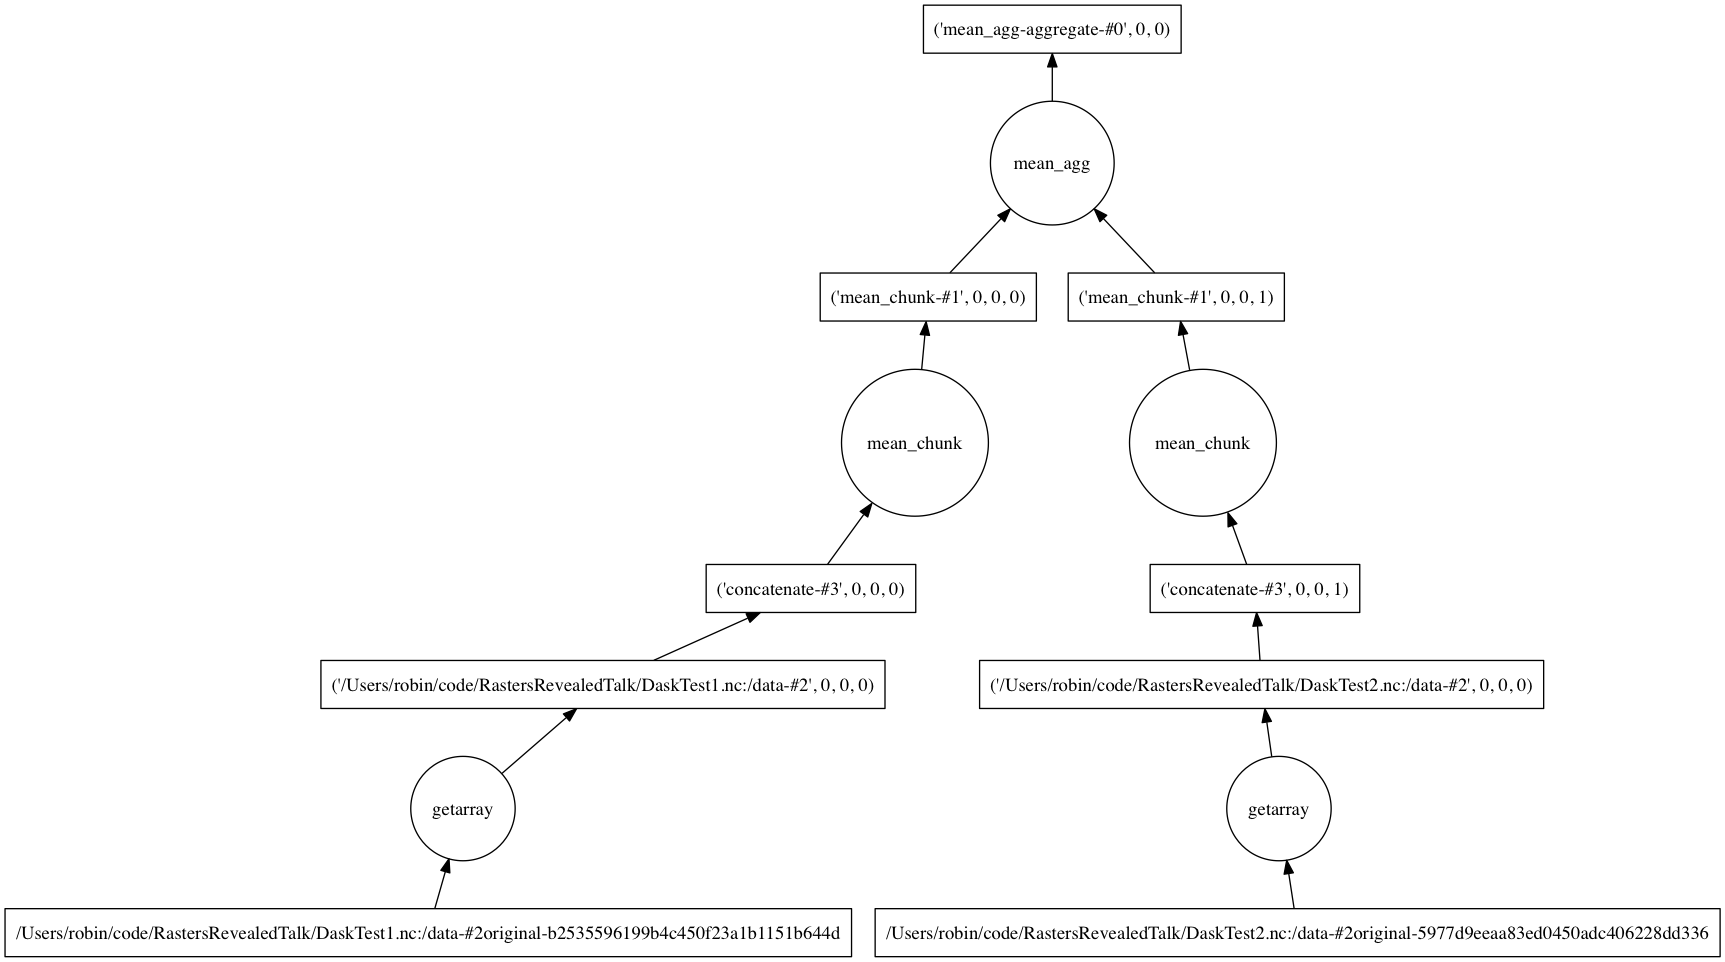

In [19]:
dot_graph(m.data.dask)

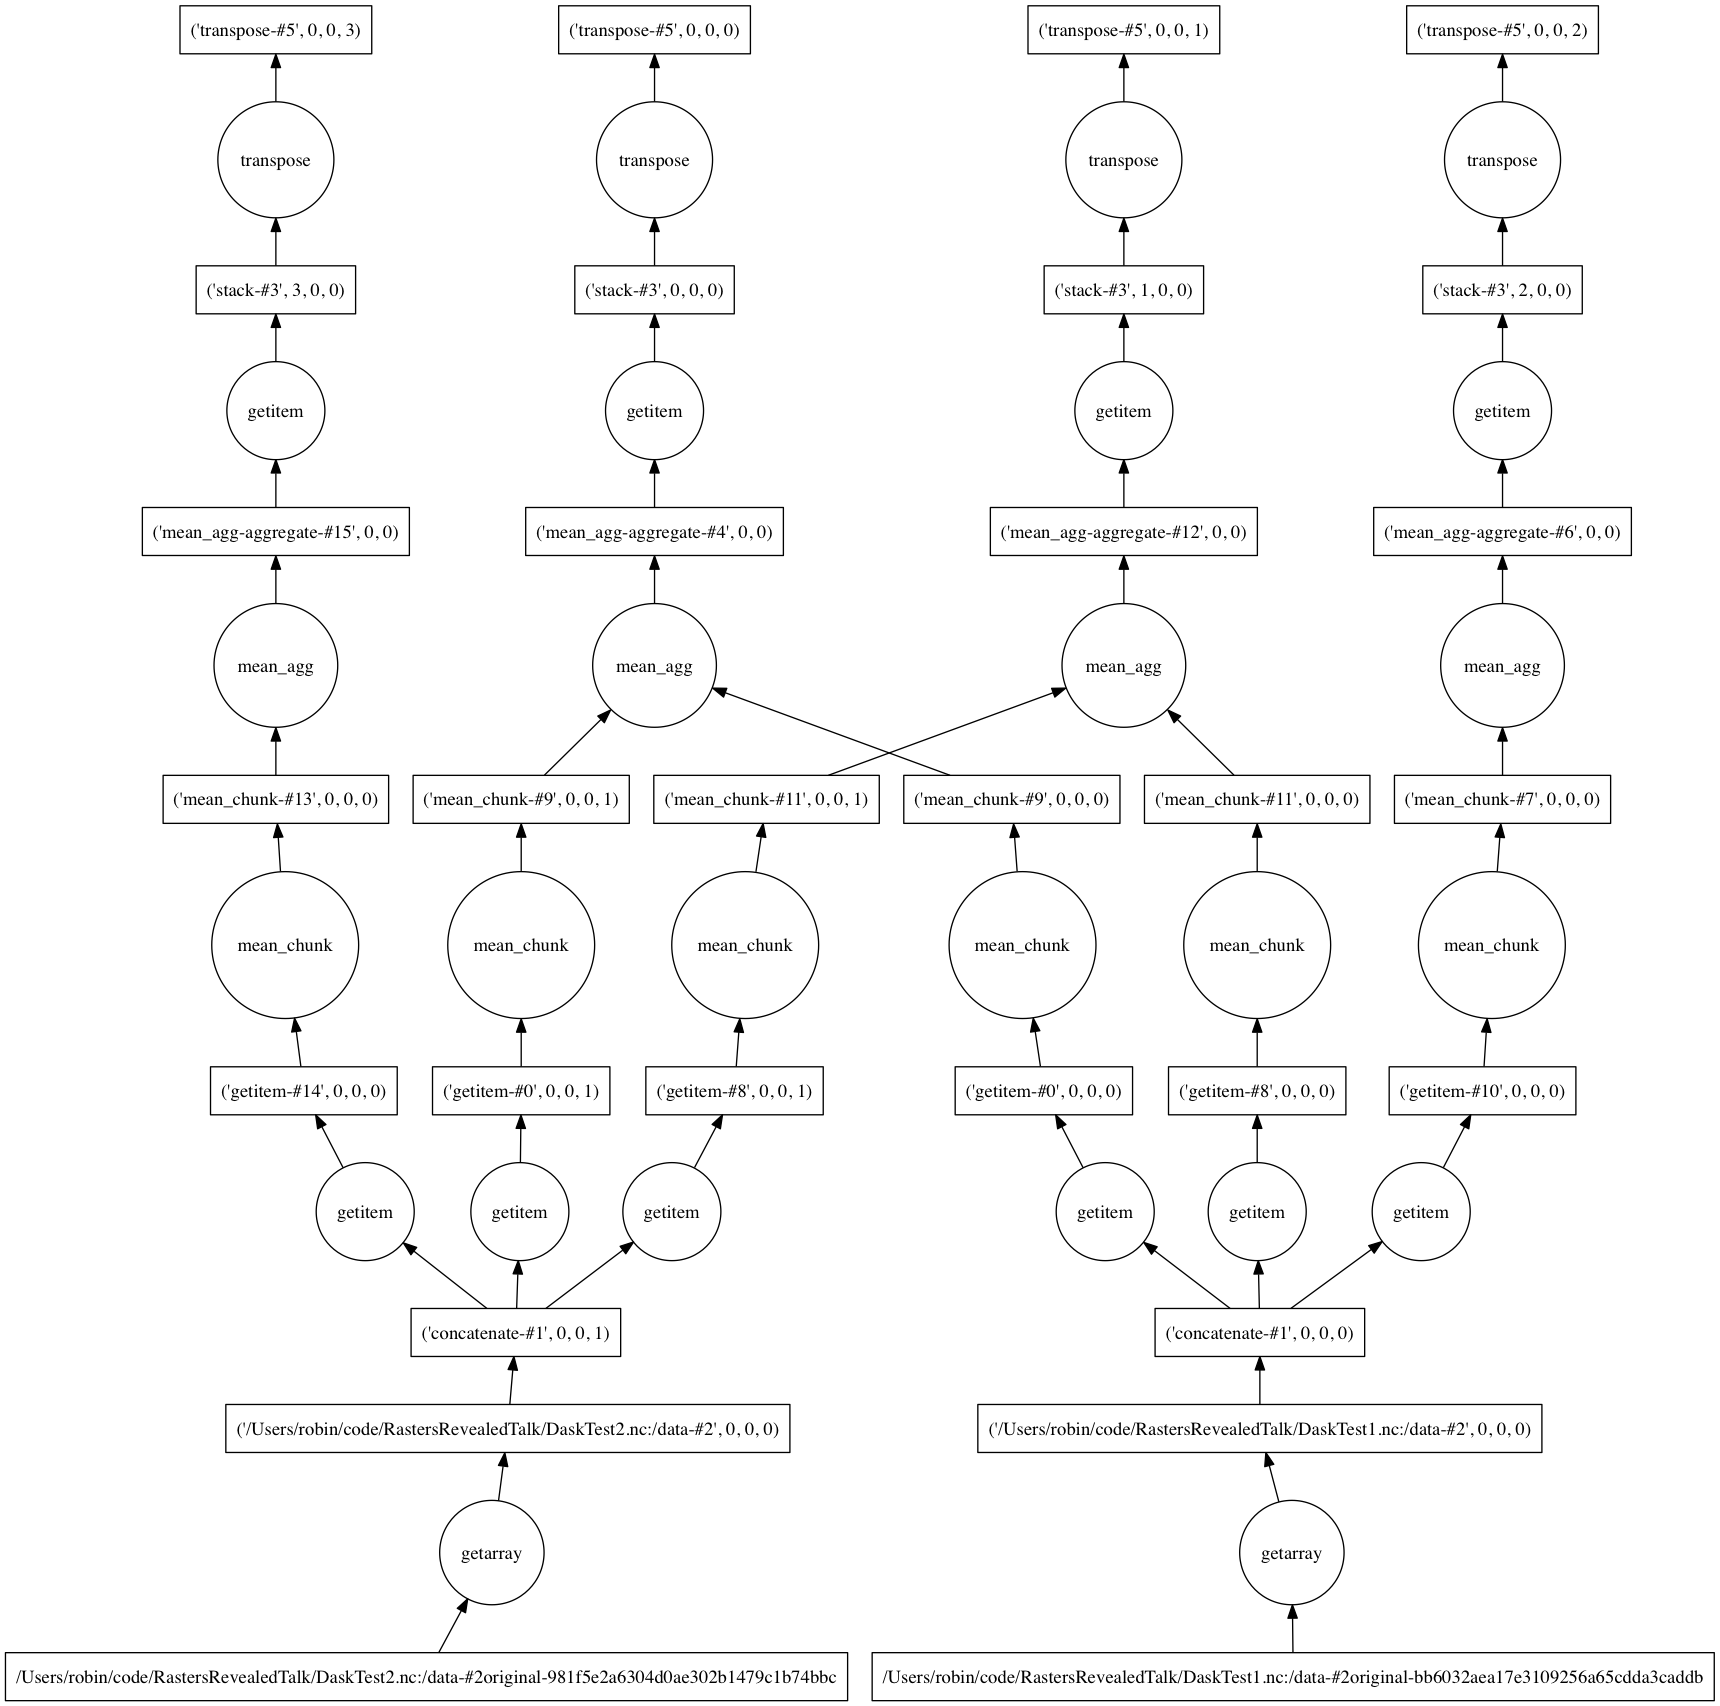

In [12]:
dot_graph(seasonal.data.dask)